# Project 1 - Final Version

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Importing and formatting data into workable lists

bigdat=pd.read_csv(r'us-counties-2021.csv')
#print(dat1)
all_counties = bigdat['county'].tolist()
states = bigdat['state'].tolist()
all_cases = bigdat['cases'].tolist()
all_deaths = bigdat['deaths'].tolist()
in_cty_list = []
in_case_list = []
in_death_list = []

In [3]:
#Separating Indiana data from the rest of the states
for i in range(len(all_counties)):
    if states[i] == "Indiana":
        in_cty_list.append(all_counties[i])
        in_case_list.append(all_cases[i])
        in_death_list.append(all_deaths[i])

In [4]:
#Reading the air pollution data by county that I created and uploaded
mydat=pd.read_csv(r'mydat.csv')
mycty = mydat['County'].tolist()
mypol = mydat['O3 8-hr (ppm)'].tolist()
mymill = mydat['Steel Mill?'].tolist()

dat_cty = []
dat_cases = []
dat_deaths = []
avg_cty_cases = np.zeros(len(mycty))
avg_cty_deaths = np.zeros(len(mycty))
print(mycty)

['Allen', 'Bartholomew', 'Boone', 'Brown', 'Carroll', 'Clark', 'Delaware', 'Elkhart', 'Floyd', 'Greene', 'Hamilton', 'Hendrick', 'Howard', 'Knox', 'Lake', 'LaPorte', 'Marion', 'Perry', 'Porter', 'Posey', 'St. Joseph', 'Shelby', 'Vanderburgh', 'Vigo', 'Wabash', 'Warrick']


In [5]:
#Averaging the deaths in 2021 and the positive cases in 2021 by county
for i in range(len(mycty)):
    cty_case_sum = 0.
    cty_death_sum = 0.
    counter = 0.
    for j in range(len(in_cty_list)):
        if in_cty_list[j] == mycty[i]:
            cty_case_sum += in_case_list[j]
            cty_death_sum += in_death_list[j]
            counter += 1

    if counter >= 1:
        avg_cty_cases[i] = cty_case_sum/counter
        avg_cty_deaths[i] = cty_death_sum/counter


In [6]:
#Creating a variable that calculates the deaths per case by county
deaths_per_case = np.zeros(len(mycty))
for i in range(len(avg_cty_cases)):
    deaths_per_case[i] = avg_cty_deaths[i]/avg_cty_cases[i];

#print(deaths_per_case)

C:\Users\bcerm\AppData\Local\Temp/ipykernel_16324/3238211037.py:4: RuntimeWarning: invalid value encountered in double_scalars
  deaths_per_case[i] = avg_cty_deaths[i]/avg_cty_cases[i];


In [7]:
#Organizing data into a single list of lists for analysis, excluding counties that do not have data recorded
workable_dat = [[],[],[],[]]
for i in range(len(mycty)):
    for j in range(4):
        if avg_cty_cases[i] > 0 and j==0:
            workable_dat[j].append(mycty[i])
        if avg_cty_cases[i] > 0 and j==1:
            workable_dat[j].append((deaths_per_case[i])*100)
        if avg_cty_cases[i] > 0 and j==2:
            workable_dat[j].append(mypol[i])
        if avg_cty_cases[i] > 0 and j==3:
            workable_dat[j].append(mymill[i])


### I have now reformed the COVID data into a deaths per case percentage by county that has available air pollution (ozone) data from the EPA. This data is in a workable form that can be combined with my steel mill and pollution data.

#### The data list is in the form of [County, Death Rate (%), 8-hr Ozone Average Concentration (PPM), Steel Mill?]

In [8]:
print(workable_dat)

[['Allen', 'Bartholomew', 'Boone', 'Brown', 'Carroll', 'Clark', 'Delaware', 'Elkhart', 'Floyd', 'Greene', 'Hamilton', 'Howard', 'Knox', 'Lake', 'LaPorte', 'Marion', 'Perry', 'Porter', 'Posey', 'St. Joseph', 'Shelby', 'Vanderburgh', 'Vigo', 'Wabash', 'Warrick'], [1.5891433664980334, 1.7784162060852955, 1.4472881715487829, 3.5868284228769496, 1.2478915134936743, 1.4688876843965666, 1.7914684306223259, 1.5477109556777835, 2.164753627608256, 2.734332613838015, 1.1335638562768982, 2.0761518392805227, 1.9800447959391998, 1.8233593329108282, 1.7590078974676748, 1.7121862302542166, 2.0300148869485906, 1.6534509041739673, 1.1759552740907133, 1.5179736901558172, 1.6864825840749345, 1.618349482887018, 1.8744668257099675, 2.0402574554309343, 1.819236590289719], [0.065, 0.063, 0.065, 0.062, 0.066, 0.063, 0.064, 0.063, 0.064, 0.066, 0.065, 0.064, 0.069, 0.07, 0.072, 0.067, 0.064, 0.072, 0.059, 0.066, 0.065, 0.064, 0.063, 0.062, 0.066], ['Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'N

In [9]:
#Separating data for counties with mills into their own list of lists for the sake of plotting
yes_mills_deathrate = [list(['a','b','c']),list([0,0,0]),list([0,0,0])]
newcount = 0
for i in range(len(workable_dat[0])):
    if workable_dat[3][i] == "Yes":
        yes_mills_deathrate[1][newcount] = workable_dat[1][i]
        yes_mills_deathrate[2][newcount] = workable_dat[2][i]
        newcount += 1
            
#Manually inputting county names with a steel mill
yes_mills_deathrate[0][0] = 'Allen'
yes_mills_deathrate[0][1] = 'Lake'
yes_mills_deathrate[0][2] = 'Porter'

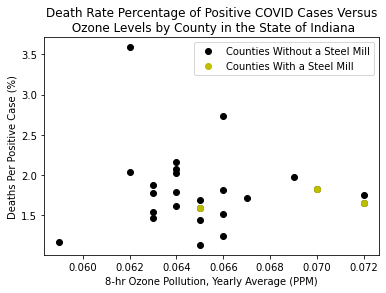

In [10]:
#print(yes_mills_deathrate)
plt.plot(workable_dat[2],workable_dat[1],'ko');
plt.plot(yes_mills_deathrate[2],yes_mills_deathrate[1],'yo');
plt.ylabel('Deaths Per Positive Case (%)');
plt.xlabel('8-hr Ozone Pollution, Yearly Average (PPM)');
plt.title('Death Rate Percentage of Positive COVID Cases Versus\n Ozone Levels by County in the State of Indiana');
plt.legend(['Counties Without a Steel Mill','Counties With a Steel Mill']);
plt.savefig('deathrate vs ozone - no reg.png')

## Performing a basic linear regression of the above data to determine if they are correlated

In [11]:
import statsmodels.api as sm
model = sm.OLS(workable_dat[1], sm.add_constant(workable_dat[2])).fit();
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.038
Method:                 Least Squares   F-statistic:                    0.1103
Date:                Fri, 21 Oct 2022   Prob (F-statistic):              0.743
Time:                        13:41:59   Log-Likelihood:                -17.698
No. Observations:                  25   AIC:                             39.40
Df Residuals:                      23   BIC:                             41.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5550      2.245      1.138      0.2

#### Looking at the P-values in the above regression analysis, we can conclude that there is not a significant linear correlation between the two data sets. I cannot reject the null hypothesis in this analysis; therefore, different analyses must be completed

In [12]:
#Creating arbitrary variables for analysis, also using the slope and intercept calculated above
modelx = np.linspace(np.min(workable_dat[2]),np.max(workable_dat[2]),len(workable_dat[2]));
modely = np.zeros(len(modelx))
model_slope = -11.43;
model_const = 2.55;

In [13]:
for i in range(len(modely)):
    modely[i] = model_slope*modelx[i] + model_const

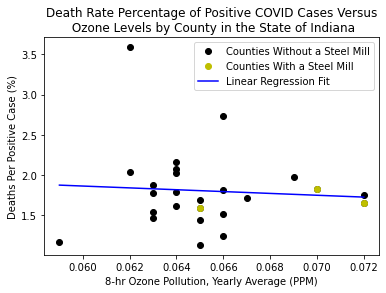

In [26]:
#Displaying the general regression performed above
plt.plot(workable_dat[2],workable_dat[1],'ko');
plt.plot(yes_mills_deathrate[2],yes_mills_deathrate[1],'yo');
plt.plot(modelx,modely,'b-');
plt.ylabel('Deaths Per Positive Case (%)');
plt.xlabel('8-hr Ozone Pollution, Yearly Average (PPM)');
plt.title('Death Rate Percentage of Positive COVID Cases Versus\n Ozone Levels by County in the State of Indiana');
plt.legend(['Counties Without a Steel Mill','Counties With a Steel Mill','Linear Regression Fit']);
plt.savefig('deathrate vs ozone - with reg.png')

## Analyzing the above data using linear regression of groups

In [15]:
#Grouping counties without a steel mill as 0 and with a steel mill as 1
group = np.zeros(len(workable_dat[0]))

for i in range(len(workable_dat[0])):
    if workable_dat[3][i] == "Yes":
        group[i] = 1
         

### I will first analyze air pollution and presence of a steel mill here

In [16]:
#Collecting data as air pollution for each group and fitting with a linear slope
X = np.c_[np.ones(len(workable_dat[0])),group]

#Using linear algebra data from the lecture file
from numpy.linalg import inv
tmp = inv(np.matmul(np.transpose(X),X))
INTERCEPT, SLOPE = tmp @ np.transpose(X) @ workable_dat[2]
print("Our intercept is ",INTERCEPT, "and our slope is", SLOPE)

plotting_temp1 = np.zeros(2)
tempx = [0,1]
for i in range(2):
    plotting_temp1[i] = SLOPE*tempx[i]+INTERCEPT

Our intercept is  0.06463636363636363 and our slope is 0.004363636363636368


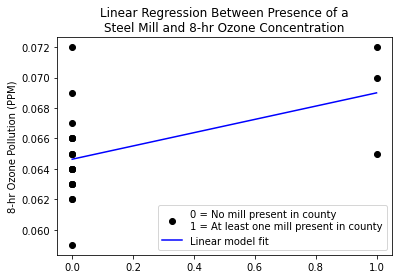

In [27]:
plt.plot(group,workable_dat[2],'ko');
plt.plot(tempx,plotting_temp1,'b-')
plt.ylabel('8-hr Ozone Pollution (PPM)');
plt.legend(['0 = No mill present in county\n1 = At least one mill present in county','Linear model fit']);
plt.title('Linear Regression Between Presence of a\nSteel Mill and 8-hr Ozone Concentration');
plt.savefig('mill presence vs ozone - with reg.png')

In [18]:
#Confirming by running linear regression package
model2 = sm.OLS(workable_dat[2], sm.add_constant(group)).fit()

print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     6.758
Date:                Fri, 21 Oct 2022   Prob (F-statistic):             0.0160
Time:                        13:42:01   Log-Likelihood:                 113.18
No. Observations:                  25   AIC:                            -222.4
Df Residuals:                      23   BIC:                            -219.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0646      0.001    111.157      0.0

#### Once again observing the P-values obtained above, I can conclude that the null hypothesis may be rejected for both parameters. This means that there is a significant correlation between air pollution and presence of a steel mill when considering the above analysis.

This result is somewhat intuitive as steel mills have long been attributed to major smog and air pollution contributions.

### I will now analyze death rate and ozone pollution in an identical manner

In [19]:
#Collecting data as air pollution for each group and fitting with a linear slope
X = np.c_[np.ones(len(workable_dat[0])),group]

#Using linear algebra data from the lecture file

tmp2 = inv(np.matmul(np.transpose(X),X))
INTERCEPT2, SLOPE2 = tmp2 @ np.transpose(X) @ workable_dat[1]
print("Our intercept is ",INTERCEPT2, "and our slope is", SLOPE2)

plotting_temp2 = np.zeros(2)
tempx2 = [0,1]
for i in range(2):
    plotting_temp2[i] = SLOPE2*tempx2[i]+INTERCEPT2

Our intercept is  1.8268758652251753 and our slope is -0.13822466403089884


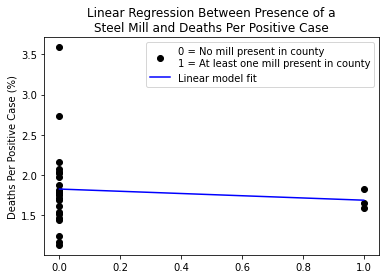

In [28]:
plt.plot(group,workable_dat[1],'ko');
plt.plot(tempx2,plotting_temp2,'b-')
plt.ylabel('Deaths Per Positive Case (%)');
plt.title('Linear Regression Between Presence of a\nSteel Mill and Deaths Per Positive Case');
plt.legend(['0 = No mill present in county\n1 = At least one mill present in county','Linear model fit']);
plt.savefig('mill presence vs death rate - with reg.png')

In [21]:
#Confirming by running linear regression package
model3 = sm.OLS(workable_dat[1], sm.add_constant(group)).fit()

print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.035
Method:                 Least Squares   F-statistic:                    0.1931
Date:                Fri, 21 Oct 2022   Prob (F-statistic):              0.664
Time:                        13:42:01   Log-Likelihood:                -17.653
No. Observations:                  25   AIC:                             39.31
Df Residuals:                      23   BIC:                             41.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8269      0.109     16.764      0.0

#### The P-values in this analysis allow me to conclude that the null hypothesis cannot be rejected for the slope parameter, but it can be rejected for the intercept. However, I am forced to conclude that there is no significant linear relation between presence of a steel mill and deaths per positive case.

## I wish to perform a regression analysis by combining the two groups into one, related equation in the form of $y = a*x_1 + b*x_2 + c*x_1*x_2 + d$

Therefore, I will conduct a grouped comparison, below.

The US EPA (as of 2015) defined a threshold of 0.07 PPM of ozone ground level concentrations over an 8-hour period as being the safe standard (https://www3.epa.gov/region1/airquality/avg8hr.html). Therefore, I will create a group wherein the ozone concentrations are changed to zeros if they are below the defined limit, and they are set to ones if they are at or above the defined limit. This will allow me to analyze the correlation between steel mill presence and air quality to determine how they affect death rate in each county.

In [22]:
EPA_lim = 0.07 #Ground level PPM ozone concentration over an 8-hr average
deathrate = workable_dat[1]
ozone = workable_dat[2]
x = group
y = np.zeros(len(deathrate))
z = np.zeros(len(deathrate))

In [23]:
#Setting up interaction variable arrays
for i in range(len(deathrate)):
    if ozone[i] >= EPA_lim:
        y[i] = 1
    
    z[i] = x[i]*y[i]

In [24]:
#Obtaining results using linear algebra
X = np.c_[np.ones(len(deathrate)),x,y,z]
tmpint = inv(np.matmul(np.transpose(X),X))
INTERCEPTint, SLOPEint1, SLOPEint2, SLOPEint3 = tmpint @ np.transpose(X) @ deathrate
print("Our intercept is ",INTERCEPTint, ", a is", SLOPEint1,", b is",SLOPEint2,", and c is ",SLOPEint3)

X = sm.add_constant(X)

Our intercept is  1.8301076732136274 , a is -0.2409643067155931 , b is -0.07109977574595394 , and c is  0.2203615277903156


In [25]:
#Confirming by running linear regression package with multiple regressors
model4 = sm.OLS(deathrate, X).fit()

print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.130
Method:                 Least Squares   F-statistic:                   0.08195
Date:                Fri, 21 Oct 2022   Prob (F-statistic):              0.969
Time:                        13:42:02   Log-Likelihood:                -17.612
No. Observations:                  25   AIC:                             43.22
Df Residuals:                      21   BIC:                             48.10
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8301      0.117     15.704      0.0

#### The P-values in this final analysis are representative of the parameters denoted above where

#### $d = const, a = x1, b = x2, c = x3$

#### This model summary allows me to conclude that there is no significant interaction between presence of a steel mill, ozone levels at or above the recommended level, and the response variable, deaths per positive case. The P-values for all three parameters (excluding the intercept) prevent me from rejecting the null hypothesis which shows that there is not a significant linear relationship for this interaction.